Epoch [1/10], Loss: 0.6261, Accuracy: 0.8146
Epoch [2/10], Loss: 0.5062, Accuracy: 0.7881
Epoch [3/10], Loss: 0.4926, Accuracy: 0.8255
Epoch [4/10], Loss: 0.4761, Accuracy: 0.7960
Epoch [5/10], Loss: 0.4763, Accuracy: 0.8109
Epoch [6/10], Loss: 0.4635, Accuracy: 0.8031
Epoch [7/10], Loss: 0.4614, Accuracy: 0.8281
Epoch [8/10], Loss: 0.4515, Accuracy: 0.8195
Epoch [9/10], Loss: 0.4560, Accuracy: 0.8211
Epoch [10/10], Loss: 0.4545, Accuracy: 0.7629


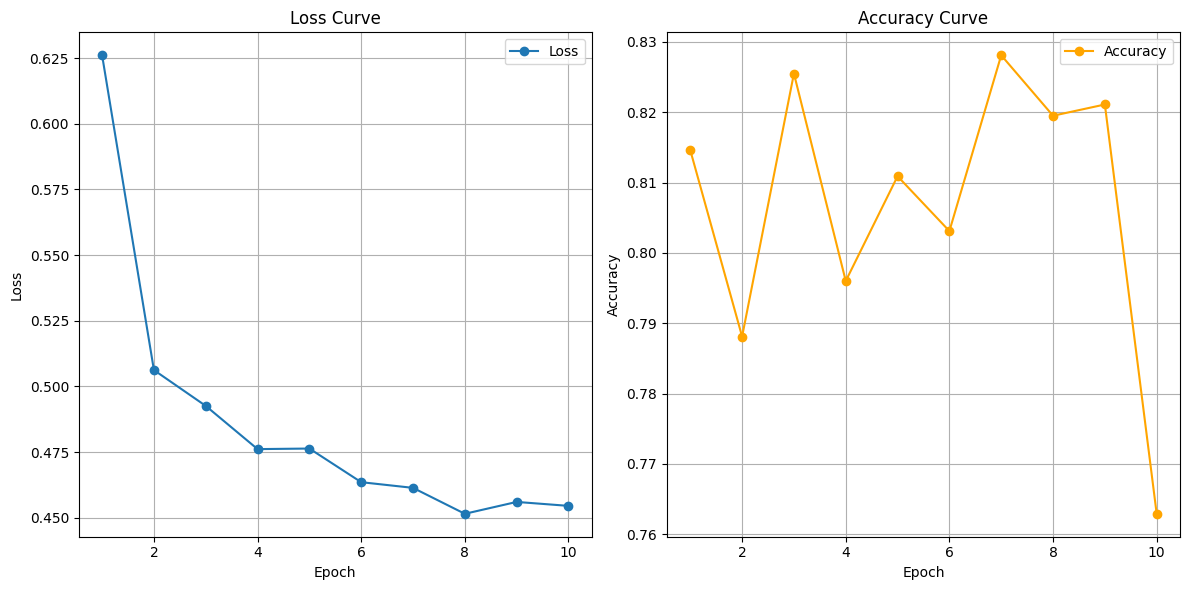

In [2]:
import torch  # 导入 PyTorch 主库
from torch import nn  # 导入神经网络模块
from torch.utils.data import DataLoader  # 用于加载数据集的工具
from torchvision import datasets, transforms  # 数据集和预处理工具
import matplotlib.pyplot as plt  # 用于绘制图形的库

class PlotLearningCurve:
    """
    一个通用的类，用于绘制训练过程中损失和准确率的变化曲线。
    """

    def __init__(self):
        self.epochs = []  # 保存 epoch 编号
        self.losses = []  # 保存每个 epoch 的平均损失
        self.accuracies = []  # 保存每个 epoch 的准确率

    def add_epoch_data(self, epoch, loss, accuracy=None):
        """
        添加一个 epoch 的损失和可选的准确率数据。

        :param epoch: 当前的 epoch 编号
        :param loss: 平均损失值
        :param accuracy: （可选）当前的准确率
        """
        self.epochs.append(epoch)  # 保存当前 epoch 编号
        self.losses.append(loss)  # 保存当前的平均损失
        if accuracy is not None:
            self.accuracies.append(accuracy)  # 如果提供了准确率，则保存

    def plot(self):
        """
        绘制损失和准确率变化曲线。
        """
        plt.figure(figsize=(12, 6))  # 设置画布大小

        # 绘制损失曲线
        plt.subplot(1, 2, 1)  # 创建第一个子图
        plt.plot(self.epochs, self.losses, marker='o', label='Loss')  # 绘制损失曲线
        plt.title('Loss Curve')  # 设置图标题
        plt.xlabel('Epoch')  # 设置 x 轴标签
        plt.ylabel('Loss')  # 设置 y 轴标签
        plt.grid(True)  # 添加网格线
        plt.legend()  # 显示图例

        # 绘制准确率曲线（如果有数据）
        if self.accuracies:
            plt.subplot(1, 2, 2)  # 创建第二个子图
            plt.plot(self.epochs, self.accuracies, marker='o', color='orange', label='Accuracy')  # 绘制准确率曲线
            plt.title('Accuracy Curve')  # 设置图标题
            plt.xlabel('Epoch')  # 设置 x 轴标签
            plt.ylabel('Accuracy')  # 设置 y 轴标签
            plt.grid(True)  # 添加网格线
            plt.legend()  # 显示图例

        plt.tight_layout()  # 调整子图间距
        plt.show()  # 显示图形

# 定义模型
class SoftmaxRegression(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SoftmaxRegression, self).__init__()  # 调用父类构造函数
        self.linear = nn.Linear(input_size, num_classes)  # 定义全连接层

    def forward(self, x):
        x=x.view(x.size(0),-1)
        return self.linear(x)  # 前向传播函数

# 数据预处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 将图像转换为张量
    transforms.Normalize((0.5,), (0.5,))  # 标准化图像数据
])

# 加载数据集
train_dataset = datasets.FashionMNIST(root='../data', train=True, transform=transform, download=True)  # 下载并加载训练数据集
test_dataset = datasets.FashionMNIST(root='../data', train=False, transform=transform, download=True)  # 下载并加载测试数据集

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)  # 定义训练数据加载器
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)  # 定义测试数据加载器

# 模型、损失函数和优化器
input_size = 28 * 28  # 输入特征的大小（28x28 像素的展平图像）
num_classes = 10  # 分类的数量
model = SoftmaxRegression(input_size, num_classes)  # 创建模型实例
criterion = nn.CrossEntropyLoss()  # 使用交叉熵作为损失函数
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)  # 使用随机梯度下降优化器

# 训练模型
num_epochs = 10  # 设置训练的 epoch 数
plotter = PlotLearningCurve()  # 创建学习曲线绘制器
device=torch.device("cuda" if torch.cuda.is_available() else "cpu")
def evaluate_accuracy(model, data_loader):
    model.eval()  # 设置模型为评估模式
    correct = 0  # 初始化正确预测数
    total = 0  # 初始化总样本数
    with torch.no_grad():  # 禁用梯度计算
        for images, labels in data_loader:  # 遍历数据加载器
            images,labels=images.to(device),labels.to(device)
            outputs = model(images)  # 前向传播
            _, predicted = torch.max(outputs, 1)  # 获取预测类别
            total += labels.size(0)  # 累加总样本数
            correct += (predicted == labels).sum().item()  # 累加正确预测数
    return correct / total  # 返回准确率

for epoch in range(num_epochs):
    model.train()  # 设置模型为训练模式
    total_loss = 0  # 初始化损失累计值
    for images, labels in train_loader:  # 遍历训练数据加载器
        images,labels=images.to(device),labels.to(device)
        # 前向传播
        outputs = model(images)  # 计算模型输出
        loss = criterion(outputs, labels)  # 计算损失

        # 反向传播和优化
        optimizer.zero_grad()  # 清除优化器中的梯度
        loss.backward()  # 计算梯度
        optimizer.step()  # 更新参数

        total_loss += loss.item()  # 累加损失

    # 计算平均损失和准确率
    avg_loss = total_loss / len(train_loader)  # 计算平均损失
    accuracy = evaluate_accuracy(model, test_loader)  # 评估测试数据的准确率

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}')  # 输出当前 epoch 的损失和准确率

    # 记录数据
    plotter.add_epoch_data(epoch + 1, avg_loss, accuracy)  # 将数据添加到绘制器

# 绘制损失和准确率曲线
plotter.plot()  # 调用绘图函数
